## Part 4

Calculate the dN/dS ratio and generate a plot of dN/dS values

In [1]:
#import statements
import sys
from fasta_iterator_class import FASTAReader
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import numpy as np

In [2]:
input_file = "/Users/cmdb/qbb2020-answers/assignment4/conv_DNA_seqs.fa"

In [3]:
alignments_file = FASTAReader(open(input_file))
alignments = []

codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


for seq_id, sequence in alignments_file:
    alignments.append((seq_id, sequence))
    
query = alignments[0]
del alignments[0]
query_sequence = query[1]
#print(query_sequence)

dS = []
dN = []


#initialize list of query codons
nucleotide_counter = 0
query_codons = []
codon = ''
for nucleotide in query_sequence:
    codon = codon + nucleotide
    nucleotide_counter +=1
    if nucleotide_counter%3 == 0:
        if codon == "---":
            dS.append('nan')
            dN.append('nan')
        else:
            dS.append(0)
            dN.append(0)
                      
        query_codons.append(codon)
        codon = ''
        nucleotide_counter = 0
        
        

In [4]:
#count number of synonymous and nonsynonymous mutations
for alignment in alignments:
    alignment_sequence = alignment[1]
    start = 0
    end = 3
    for j, query_codon in enumerate(query_codons):
        alignment_codon = alignment_sequence[start:end]
        
        #ignore empty codons in query
        if query_codon == "---":
            start +=3
            end +=3
            continue
        
        #ignore empty codon in alignment sequence
        elif alignment_codon == "---":
            start +=3
            end +=3
        
        #perfect match, no mutation
        elif alignment_codon == query_codon:
            start +=3
            end +=3
        
        #alignment[start:end] != query_codon:, some sort of mutation
        else:
            if alignment_codon in codontable:
                #synonmymous mutation
                if codontable[query_codon] == codontable[alignment_codon]:
                    dS[j]+=1
                
                #non-synonymous mutation
                else:
                    dN[j]+=1

            
    
    

In [5]:
#calculate ratio of non_synonymous mutations to synonymous
dN_dS = []
for i, synonymous in enumerate(dS):
    non_synonymous = dN[i]
    if synonymous == "nan" or non_synonymous == "nan":
        dN_dS.append("nan")
    elif synonymous == 0 or non_synonymous == 0:
        dN_dS.append("nan")
    else:
        dN_dS.append(non_synonymous/synonymous)
        



In [6]:
#place position of codon and dN/dS ratios in separate lists without nan
filtered_ratios = []
codon_position = []
for i, ratio in enumerate(dN_dS):
    if ratio == "nan":
        continue
    
    filtered_ratios.append(ratio)
    codon_position.append(i)



In [7]:
#calculate D = dN - dS without nan
difference = []
for i, synonymous in enumerate(dS):
    non_synonymous = dN[i]
    if synonymous == "nan" or non_synonymous == "nan":
        continue
    elif synonymous == 0 or non_synonymous == 0:
        continue
    else:
        difference.append(non_synonymous-synonymous)
        
#calulate p-values
difference = np.array(difference)
z_scores = stats.zscore(difference)

z_scores = list(z_scores)

In [8]:
#make separate lists of insignificant and signicant ratios for plotting
sig_ratios = []
insig_ratios = []
sig_positions = []
insig_positions = []

for i, z_score in enumerate(z_scores):
    #significant
    if z_score<-1.96 or z_score>1.96:
        sig_ratios.append(filtered_ratios[i])
        sig_positions.append(codon_position[i])
    #insignificant
    else:
        insig_ratios.append(filtered_ratios[i])
        insig_positions.append(codon_position[i])
        
  

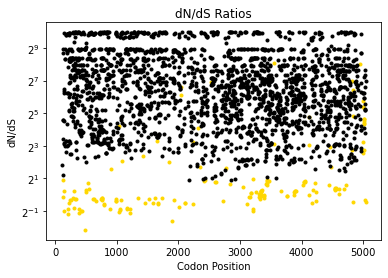

In [9]:
#generate dN/dS plot, samples marked with gold are significant
fig, ax = plt.subplots()
ax.scatter(sig_positions, sig_ratios, marker = '.', color = 'gold')
ax.scatter(insig_positions, insig_ratios, marker = '.', color ='black')
ax.set_yscale('log', base=2)
plt.title("dN/dS Ratios")
plt.xlabel("Codon Position")
plt.ylabel("dN/dS")

plt.show()